In [1]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import clean_predict

In [2]:
x = joblib.load('bow')
# x = joblib.load(r'D:\final project\DataBase\Output\Output For Modelling\feature_extraction')
y = joblib.load(r'D:\final project\DataBase\Output\Output For Modelling\sentiment')

In [4]:
plt.style.use('ggplot')

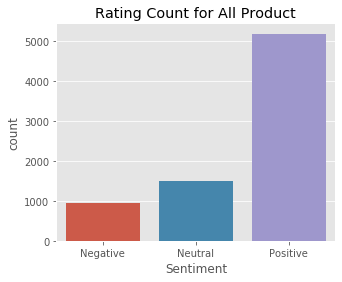


Percentage of Positive review: 12.55%
Percentage of Neutral review: 19.48%
Percentage of Negative review: 67.97%


In [5]:
plt.figure(figsize = (5,4))
sns.countplot(y)
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.title('Rating Count for All Product')
plt.xlabel('Sentiment')
plt.show() 
print(f'\nPercentage of Positive review: {round(y.value_counts().loc[-1]/len(y)*100, 2)}%')
print(f'Percentage of Neutral review: {round(y.value_counts().loc[0]/len(y)*100, 2)}%')
print(f'Percentage of Negative review: {round(y.value_counts().loc[1]/len(y)*100, 2)}%')

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)

# Baseline model with Machine Learning Algorithm

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

## 1. Multinominal Naive Bayes

In [5]:
mul_nb = MultinomialNB()
mul_nb.fit(x_train, y_train)
predict = mul_nb.predict(x_test)
print(classification_report(y_test, predict))
mul_nb_acc_train = round(mul_nb.score(x_train, y_train), 2)
mul_nb_acc_test = round(mul_nb.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.40      0.37      0.38       277
           0       0.34      0.27      0.30       423
           1       0.78      0.84      0.81      1591

    accuracy                           0.68      2291
   macro avg       0.51      0.49      0.50      2291
weighted avg       0.66      0.68      0.66      2291



In [6]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predict = logreg.predict(x_test)
print(classification_report(y_test, predict)) 
logreg_acc_train = round(logreg.score(x_train, y_train), 2)
logreg_acc_test = round(logreg.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.48      0.36      0.41       277
           0       0.30      0.26      0.28       423
           1       0.78      0.84      0.81      1591

    accuracy                           0.68      2291
   macro avg       0.52      0.49      0.50      2291
weighted avg       0.66      0.68      0.67      2291



## 3. K-Nearest Neighbors

In [7]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
print(classification_report(y_test, predict))
knn_acc_train = round(knn.score(x_train, y_train), 2)
knn_acc_test = round(knn.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.32      0.07      0.12       277
           0       0.29      0.03      0.06       423
           1       0.71      0.97      0.82      1591

    accuracy                           0.69      2291
   macro avg       0.44      0.36      0.33      2291
weighted avg       0.58      0.69      0.59      2291



## 4. Stochastic Gradient Descend

In [8]:
sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)
predict = sgdc.predict(x_test)
print(classification_report(y_test, predict))
sgdc_acc_train = round(sgdc.score(x_train, y_train), 2)
sgdc_acc_test = round(sgdc.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.38      0.33      0.35       277
           0       0.26      0.28      0.27       423
           1       0.78      0.78      0.78      1591

    accuracy                           0.63      2291
   macro avg       0.47      0.46      0.47      2291
weighted avg       0.64      0.63      0.64      2291



## 5. Decision Tree

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predict = dtree.predict(x_test)
print(classification_report(y_test, predict))
dtree_acc_train = round(dtree.score(x_train, y_train), 2)
dtree_acc_test = round(dtree.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.27      0.25      0.26       277
           0       0.24      0.22      0.22       423
           1       0.74      0.77      0.75      1591

    accuracy                           0.60      2291
   macro avg       0.42      0.41      0.41      2291
weighted avg       0.59      0.60      0.60      2291



## 6. Random Forest

In [10]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
print(classification_report(y_test, predict))
rfc_acc_train = round(rfc.score(x_train, y_train), 2)
rfc_acc_test = round(rfc.score(x_test, y_test), 2)

              precision    recall  f1-score   support

          -1       0.60      0.11      0.18       277
           0       0.49      0.06      0.10       423
           1       0.72      0.99      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.60      0.38      0.37      2291
weighted avg       0.66      0.71      0.62      2291



In [11]:
print(classification_report(y_train, rfc.predict(x_train)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       681
           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00      3598

    accuracy                           1.00      5343
   macro avg       1.00      1.00      1.00      5343
weighted avg       1.00      1.00      1.00      5343



In [14]:
for i in 'mul_nb logreg knn sgdc dtree rfc'.split():
    print(i+'_acc_train')
    # print(i+'_acc_test')

mul_nb_acc_train
logreg_acc_train
knn_acc_train
sgdc_acc_train
dtree_acc_train
rfc_acc_train


In [15]:
model = ['NBayes', 'LReg', 'KNN', 'SGD', 'DTree', 'RForest'] 
print('\nAccuracy for each model')
summary = pd.DataFrame({'Model': model, 
'train accuracy': [mul_nb_acc_train, logreg_acc_train, knn_acc_train, sgdc_acc_train, dtree_acc_train, rfc_acc_train],
'test accuracy': [mul_nb_acc_test, logreg_acc_test, knn_acc_test, sgdc_acc_test, dtree_acc_test, rfc_acc_test]})
summary


Accuracy for each model


,Model,train accuracy,test accuracy
0,NBayes,0.69,0.70
1,LReg,0.79,0.71
2,KNN,0.68,0.70
3,SGD,0.86,0.71
4,DTree,1.00,0.62
5,RForest,1.00,0.71


Conc: <br>
Model yang dipakai selanjutnya adalah Logistic Regression dan Random Forest <br>
Karena model ini overfitting, maka yang akan dilakukan selanjutnya adalah reduce feature dan menambahkan training sample 


# PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=100)
x_pca = pca.fit_transform(x)

In [18]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 22)

Hasil reduce

In [19]:
logreg.fit(x_train_pca, y_train)
print('logistic regression with pca score (train): ' + str(round(logreg.score(x_train_pca, y_train), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test_pca, y_test), 2)))

logistic regression with pca score (train): 0.7
logistic regression with pca score (test): 0.71


In [20]:
rfc.fit(x_train_pca, y_train)
print('random forest with pca score (train): ' + str(round(rfc.score(x_train_pca, y_train), 2)))
print('random forest with pca score (test): ' + str(round(rfc.score(x_test_pca, y_test), 2)))

random forest with pca score (train): 1.0
random forest with pca score (test): 0.71


# Oversampling with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
y_train.value_counts()

 1    3598
 0    1064
-1     681
Name: positivity, dtype: int64

Oversampling

In [23]:
sm = SMOTE(sampling_strategy='minority')
oversampled_train_x, oversampled_train_y = sm.fit_sample(x_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_train_y), pd.DataFrame(oversampled_train_x)], axis = 1)

In [24]:
pd.Series(oversampled_train_y).value_counts()

-1    3598
 1    3598
 0    1064
Name: positivity, dtype: int64

In [25]:
logreg.fit(oversampled_train_x, oversampled_train_y)
print('logistic regression with pca score (train): ' + str(round(logreg.score(oversampled_train_x, oversampled_train_y), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test, y_test), 2)))

logistic regression with pca score (train): 0.86
logistic regression with pca score (test): 0.7


In [26]:
rfc.fit(oversampled_train_x, oversampled_train_y)
print('random forest with pca score (train): ' + str(round(rfc.score(oversampled_train_x, oversampled_train_y), 2)))
print('random forest with pca score (test): ' + str(round(rfc.score(x_test, y_test), 2)))

random forest with pca score (train): 1.0
random forest with pca score (test): 0.71


Reduce + oversampled

In [27]:
sm = SMOTE(sampling_strategy='minority')
oversampled_train_x, oversampled_train_y = sm.fit_sample(x_train_pca, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_train_y), pd.DataFrame(oversampled_train_x)], axis = 1)

In [28]:
logreg.fit(oversampled_train_x, oversampled_train_y)
print('logistic regression with pca score (train): ' + str(round(logreg.score(oversampled_train_x, oversampled_train_y), 2)))
print('logistic regression with pca score (test): ' + str(round(logreg.score(x_test_pca, y_test), 2)))

logistic regression with pca score (train): 0.71
logistic regression with pca score (test): 0.62


In [29]:
rfc.fit(oversampled_train_x, oversampled_train_y)
print('random forest with pca score (train): ' + str(round(rfc.score(oversampled_train_x, oversampled_train_y), 2)))
print('random forest with pca score (test): ' + str(round(rfc.score(x_test_pca, y_test), 2)))

random forest with pca score (train): 1.0
random forest with pca score (test): 0.69


Conc: baseline model with logistic regression + pca

# Tuning

with GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rfc = RandomForestClassifier()

In [32]:
search = GridSearchCV(estimator = rfc,
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'bootstrap': [True, False],
    'min_samples_split' : [2, 5, 10, 20]},
    scoring = 'accuracy',
    verbose = 1,
    cv = 5,
    n_jobs = -1)

In [33]:
search.fit(x_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 18.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [34]:
search.best_params_

{'bootstrap': False, 'min_samples_split': 5, 'n_estimators': 300}

In [35]:
search.best_score_

0.6859436695711277

In [37]:
search = GridSearchCV(estimator = rfc,
param_grid = {
    'n_estimators': [250, 300, 350],
    'bootstrap': [False],
    'min_samples_split' : range(3, 7)},
    scoring = 'accuracy',
    verbose = 1,
    cv = 10,
    n_jobs = -1)

In [38]:
search.fit(x_train_pca, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'min_samples_split': range(3, 7),
                         'n_estimators': [250, 300, 350]},
             scoring='accuracy', verbose=1)

In [39]:
search.best_params_

{'bootstrap': False, 'min_samples_split': 4, 'n_estimators': 350}

In [40]:
search.best_score_

0.6883772620672757

In [41]:
rfc = RandomForestClassifier(max_depth=100, bootstrap=False)

In [43]:
rfc.fit(x_train_pca, y_train)
print(classification_report(y_test, rfc.predict(x_test_pca)))

              precision    recall  f1-score   support

          -1       0.58      0.12      0.19       277
           0       0.39      0.04      0.08       423
           1       0.71      0.98      0.83      1591

    accuracy                           0.70      2291
   macro avg       0.56      0.38      0.37      2291
weighted avg       0.64      0.70      0.61      2291



In [44]:
print(classification_report(y_train, rfc.predict(x_train_pca)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       681
           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00      3598

    accuracy                           1.00      5343
   macro avg       1.00      1.00      1.00      5343
weighted avg       1.00      1.00      1.00      5343



# Boosting

In [47]:
from xgboost import XGBClassifier

In [85]:
xgboost = XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 2, n_jobs = -1)

#learning_rate = 0.5, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.87 test: 0.69
#learning_rate = 0.25, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.80 test: 0.71 dis
#learning_rate = 0.1, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.74 test: 0.71
#learning_rate = 0.01, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.68 test: 0.70
#learning_rate = 0.005, n_estimators = 1000, max_depth = 1, n_jobs = -1 | train: 0.67 test: 0.69

#learning_rate = 0.25, n_estimators = 500, max_depth = 1, n_jobs = -1 | train: 0.71 test: 0.70 dis
#learning_rate = 0.25, n_estimators = 100, max_depth = 1, n_jobs = -1 | train: 0.68 test: 0.70

#learning_rate = 0.25, n_estimators = 500, max_depth = 2, n_jobs = -1 | train: 0.76 test: 0.71

In [86]:
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
print(classification_report(y_train, xgboost.predict(x_train)))

              precision    recall  f1-score   support

          -1       0.85      0.36      0.51       681
           0       0.85      0.23      0.36      1064
           1       0.75      0.99      0.85      3598

    accuracy                           0.76      5343
   macro avg       0.81      0.53      0.57      5343
weighted avg       0.78      0.76      0.71      5343



In [88]:
print(classification_report(y_test, xgboost.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.58      0.22      0.32       277
           0       0.36      0.09      0.14       423
           1       0.73      0.96      0.83      1591

    accuracy                           0.71      2291
   macro avg       0.56      0.42      0.43      2291
weighted avg       0.65      0.71      0.64      2291

